**BUSINESS SUMMARY:**

This dataset is a collection of tweets that have been analyzed for emotions directed towards specific brands or products. Each tweet is categorized by the brand or product it mentions and the type of emotion expressed.


**OBJECTIVES:**

**Sentiment Analysis:** *Identify and classify the sentiment of tweets (positive, negative, or neutral) directed at various brands or products. This can help understand public perception and sentiment trends over time.*


**Brand Reputation Management:** *Track and manage the reputation of brands and products by analyzing the emotions expressed in tweets. This can help in proactive crisis management and brand strategy adjustments.*

**Market Research:** *Gather insights into customer preferences and opinions about different products or brands. This can be valuable for product development, marketing strategies, and competitive analysis.*

**Trend Analysis:** *Detect emerging trends and shifts in customer sentiment towards brands and products. This can help businesses stay ahead of market changes and consumer expectations.*

**Customer Feedback**: *Use the dataset to gather direct customer feedback and experiences related to products and brands. This can aid in improving customer service and satisfaction.*

**Campaign Effectiveness:** *Evaluate the impact of marketing campaigns by analyzing the change in sentiment before and after campaign launches. This can help refine marketing strategies for better engagement and results.*


**DATASET INFORMATION**

The dataset is obtained from
https://www.crowdflower.com/data-for-everyone/ and includes three columns:


1.   ***tweet_text***: The content of the tweet.


2.   ***emotion_in_tweet_is_directed_at***: The brand or product mentioned in the tweet.

3. ***is_there_an_emotion_directed_at_a_brand_or_product***: The type of emotion expressed towards the mentioned brand or product.





1. ***IMPORTING MODULES***

In [43]:
#Importing python libraries

from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import re
import string
import nltk
import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [46]:
#Displaying
df = pd.read_csv("tweet_product_company.csv",encoding = "ISO-8859-1")
df.head(20)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


### Data Inspection and preprocessing

In [47]:
df.shape

(9093, 3)

In [48]:
#Categorizing tweets using binary values

def categorize_sentiment(sentiment):
    """
    Categorizes sentiment into three binary classes:
    Positive sentiment: [1, 0, 0]
    Negative sentiment: [0, 1, 0]
    No emotion: [0, 0, 1]
    """
    if sentiment == 'Positive emotion':
        return [1, 0, 0]
    elif sentiment == 'Negative emotion':
        return [0, 1, 0]
    else:  # This handles 'No emotion toward brand or product' and other cases
        return [0, 0, 1]

In [49]:
#Binary Sentiment counts
df['binary_sentiment'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].apply(categorize_sentiment)
binary_sentiment_counts = df['binary_sentiment'].value_counts()
print(binary_sentiment_counts)


binary_sentiment
[0, 0, 1]    5545
[1, 0, 0]    2978
[0, 1, 0]     570
Name: count, dtype: int64


In [50]:
#Displaying  positive tweets
positive_tweets = df[df['binary_sentiment'].apply(lambda x: x == [1, 0, 0])]
positive_tweets.head(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,binary_sentiment
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,"[1, 0, 0]"
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,"[1, 0, 0]"
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,"[1, 0, 0]"
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion,"[1, 0, 0]"
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion,"[1, 0, 0]"
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion,"[1, 0, 0]"
10,Excited to meet the @samsungmobileus at #sxsw ...,Android,Positive emotion,"[1, 0, 0]"
11,Find &amp; Start Impromptu Parties at #SXSW Wi...,Android App,Positive emotion,"[1, 0, 0]"
12,"Foursquare ups the game, just in time for #SXS...",Android App,Positive emotion,"[1, 0, 0]"
13,Gotta love this #SXSW Google Calendar featurin...,Other Google product or service,Positive emotion,"[1, 0, 0]"


In [51]:
negative_tweets = df[df['binary_sentiment'].apply(lambda x: x == [0, 1, 0])]
negative_tweets.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,binary_sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,"[0, 1, 0]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,"[0, 1, 0]"
17,I just noticed DST is coming this weekend. How...,iPhone,Negative emotion,"[0, 1, 0]"
38,@mention - False Alarm: Google Circles Not Co...,Google,Negative emotion,"[0, 1, 0]"
64,Again? RT @mention Line at the Apple store is ...,NaN,Negative emotion,"[0, 1, 0]"


In [52]:
neutral_tweets = df[df['binary_sentiment'].apply(lambda x: x == [0, 0, 1])]
neutral_tweets.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,binary_sentiment
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product,"[0, 0, 1]"
6,NaN,NaN,No emotion toward brand or product,"[0, 0, 1]"
16,Holler Gram for iPad on the iTunes App Store -...,NaN,No emotion toward brand or product,"[0, 0, 1]"
32,"Attn: All #SXSW frineds, @mention Register fo...",NaN,No emotion toward brand or product,"[0, 0, 1]"
33,Anyone at #sxsw want to sell their old iPad?,NaN,No emotion toward brand or product,"[0, 0, 1]"


**TEXT CLEANING**

In [53]:
#Removing special characters, punctuations, and numerals

def clean_text(text):
  """
  Cleans text by removing punctuations, numerals, and two-character words.

  Args:
    text: The input text string.

  Returns:
    The cleaned text string.
  """
  # Check if the text is a string before cleaning
  if isinstance(text, str):
    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numerals
    text = re.sub(r'\d+', '', text)

    # Remove two-character words
    text = re.sub(r'\b\w{1,2}\b', '', text)

    # Removing extra spaces
    text = re.sub(' +', ' ', text)

  # If not a string (e.g., NaN), return the original value
  else:
    text = text

  return text

# Apply the cleaning function to the 'tweet_text' column
df['cleaned_tweet_text'] = df['tweet_text'].apply(clean_text)

cleaned_df = df[['cleaned_tweet_text']]
print(cleaned_df.head(10))


                                  cleaned_tweet_text
0  wesley have iPhone After hrs tweeting RISEAust...
1  jessedee Know about fludapp Awesome iPadiPhone...
2  swonderlin Can not wait for iPad also They sho...
3  sxsw hope this years festival isnt crashy this...
4  sxtxstate great stuff Fri SXSW Marissa Mayer G...
5  teachntech New iPad Apps For SpeechTherapy And...
6                                                NaN
7  SXSW just starting CTIA around the corner and ...
8  Beautifully smart and simple idea madebymany t...
9  Counting down the days sxsw plus strong Canadi...


## Text Transformation

This step will include **tokenization** diving text into small units, **lemmatization** which involve reducing words to their base form , and removing captization and short words.

In [57]:
def cleaned_df(text):
    """
    Preprocess text by tokenizing, lemmatizing, and removing capitalization, as well as stop words.

    Args:
        text: The input text string.

    Returns: The processed text string.
    """
    # Check if the text is a string before processing
    if isinstance(text, str):
        tokenizer = RegexpTokenizer(r'\w+')
        tokens = tokenizer.tokenize(text.lower())
        stop_words = set(stopwords.words('english'))
        lemmatizer = WordNetLemmatizer()
        lemmas = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
        return lemmas
    else:
        # Handle non-string values (e.g., NaN) by returning an empty list or a placeholder
        return []  # or return ['nan_placeholder']

# Assuming your DataFrame is named 'df' and has a column 'tweet_text'
df['lemmatized_text'] = df['tweet_text'].apply(cleaned_df)

# Print the DataFrame with the new 'lemmatized_text' column
df[['tweet_text', 'lemmatized_text']].head()

,tweet_text,lemmatized_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,"[wesley83, 3g, iphone, 3, hr, tweeting, rise_a..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,"[jessedee, know, fludapp, awesome, ipad, iphon..."
2,@swonderlin Can not wait for #iPad 2 also. The...,"[swonderlin, wait, ipad, 2, also, sale, sxsw]"
3,@sxsw I hope this year's festival isn't as cra...,"[sxsw, hope, year, festival, crashy, year, iph..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,"[sxtxstate, great, stuff, fri, sxsw, marissa, ..."


In [64]:
#Remove short words such as hr

df['lemmatized_text'] = df['lemmatized_text'].apply(lambda x: [word for word in x if len(word) > 3])
df[['tweet_text', 'lemmatized_text']].head()

,tweet_text,lemmatized_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,"[wesley83, iphone, tweeting, rise_austin, dead..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,"[jessedee, know, fludapp, awesome, ipad, iphon..."
2,@swonderlin Can not wait for #iPad 2 also. The...,"[swonderlin, wait, ipad, also, sale, sxsw]"
3,@sxsw I hope this year's festival isn't as cra...,"[sxsw, hope, year, festival, crashy, year, iph..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,"[sxtxstate, great, stuff, sxsw, marissa, mayer..."


In [66]:
#list of the first 5 lemmatized texts.
tokenized_tweets = df['lemmatized_text'].tolist()
tokenized_tweets[:5]


[['wesley83',
  'iphone',
  'tweeting',
  'rise_austin',
  'dead',
  'need',
  'upgrade',
  'plugin',
  'station',
  'sxsw'],
 ['jessedee',
  'know',
  'fludapp',
  'awesome',
  'ipad',
  'iphone',
  'likely',
  'appreciate',
  'design',
  'also',
  'giving',
  'free',
  'sxsw'],
 ['swonderlin', 'wait', 'ipad', 'also', 'sale', 'sxsw'],
 ['sxsw', 'hope', 'year', 'festival', 'crashy', 'year', 'iphone', 'sxsw'],
 ['sxtxstate',
  'great',
  'stuff',
  'sxsw',
  'marissa',
  'mayer',
  'google',
  'reilly',
  'tech',
  'book',
  'conference',
  'matt',
  'mullenweg',
  'wordpress']]

##Data Visualisation

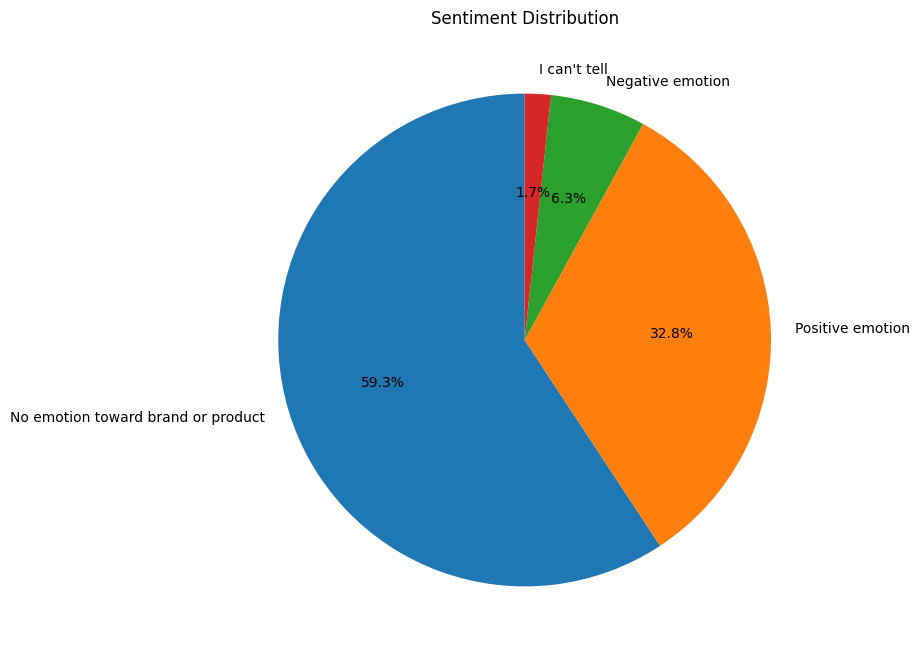

In [67]:
#Visualizing sentiments using pie-chart

sentiment_counts = df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.show()

*From the pie_chart, more than 59 % of the analyzed tweets were neutral. About 32 % rated the products and brands positively , while less than 7 per cent rated the products negatively.*

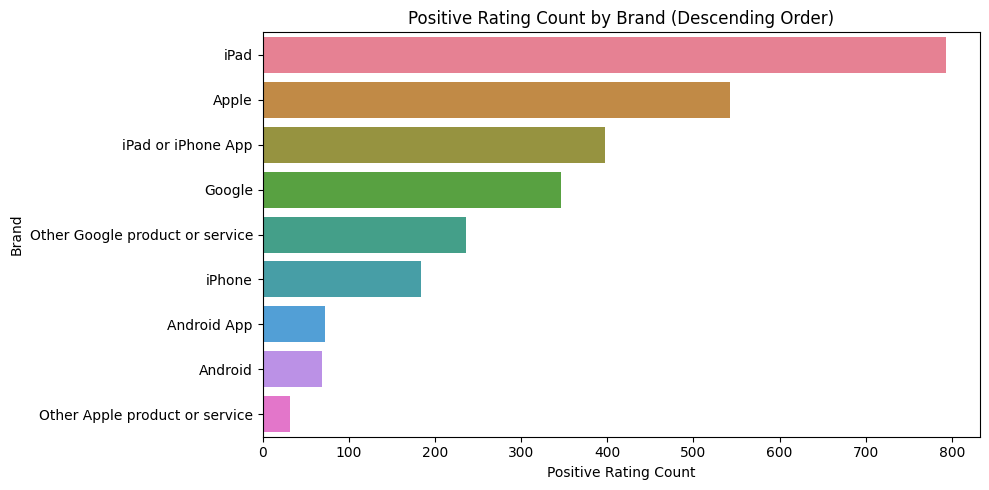

In [79]:
# Compare positive rating of different brands

# Change the column name in the filter condition to the correct name
brand_positive_counts = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion'].groupby('emotion_in_tweet_is_directed_at').size().reset_index(name='tweet_text')

# Sort the DataFrame in descending order
brand_positive_counts = brand_positive_counts.sort_values(by=['tweet_text'], ascending=False)

# Create a list of colors for the bars
colors = sns.color_palette("husl", len(brand_positive_counts))  # Example: 'husl' palette

# Create the horizontal bar plot
plt.figure(figsize=(10, 5))  # Adjust figure size if needed
sns.barplot(x='tweet_text', y='emotion_in_tweet_is_directed_at', data=brand_positive_counts, palette=colors, orient='h')
plt.xlabel('Positive Rating Count')
plt.ylabel('Brand')
plt.title('Positive Rating Count by Brand (Descending Order)')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [86]:
!pip install wordcloud

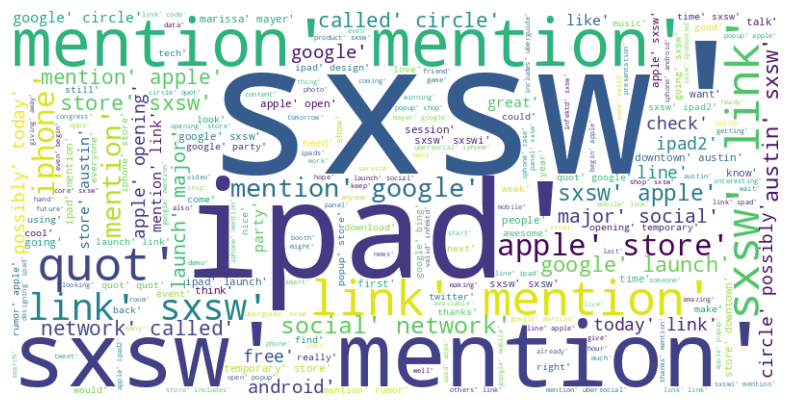

In [89]:
#Visualize frequent words

from wordcloud import WordCloud

# Use the 'cleaned_tweet_text' column from the DataFrame 'df'
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['lemmatized_text'].astype(str)))

#Plot the graph
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

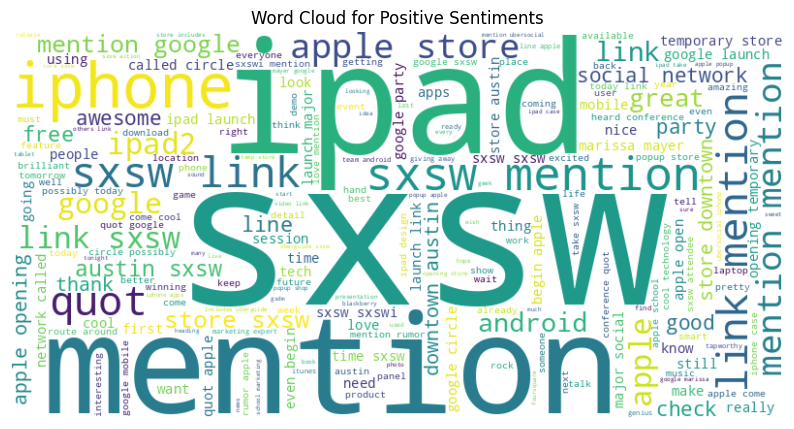

In [101]:
#Visualize positive sentiments

lemmatized_positive_tweets = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion']['lemmatized_text']
positive_words = " ".join([" ".join(sentence) for sentence in lemmatized_positive_tweets])

#plot word cloud

plt.figure(figsize=(10, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Positive Sentiments") # Add a title for clarity
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

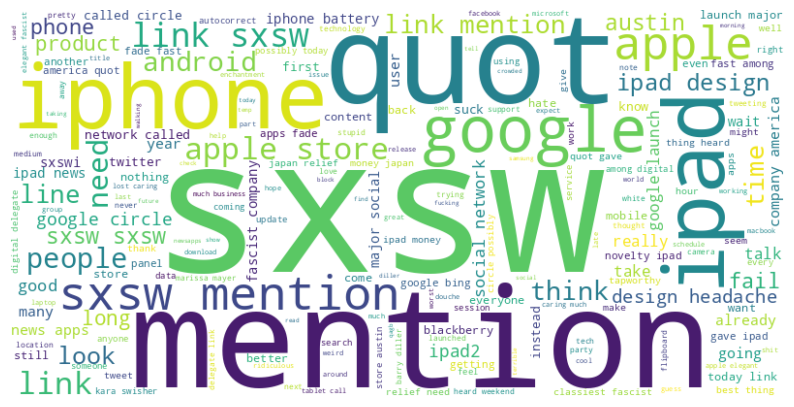

In [102]:
#plot negative sentiments

lemmatized_negative_tweets = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion']['lemmatized_text']
negative_words = " ".join([" ".join(sentence) for sentence in lemmatized_negative_tweets])

plt.figure(figsize=(10, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt

In [104]:
#extract the hashtags

def extract_hashtags(text):
    """
    Extract hashtags from text.

    Args:
        text: The input text string.

    Returns:
        A list of hashtags found in the text.
    """
    # Convert input to string if it's not already, handling NaN
    text = str(text)
    hashtags = re.findall(r"#(\w+)", text)
    return hashtags

# Apply the hashtag extraction function to the 'tweet_text' column
df['hashtags'] = df['tweet_text'].apply(extract_hashtags)

In [105]:
#extract hashtags for positive ratings

positive_hashtags = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion']['hashtags']
positive_hashtags

,hashtags
1,[SXSW]
2,"[iPad, SXSW]"
4,[SXSW]
7,"[SXSW, CTIA, googleio, android]"
8,"[hollergram, sxsw]"
...,...
9072,"[Sxsw, zazzlesxsw, sxswi]"
9077,"[sxsw, princess]"
9079,[SXSW]
9085,"[SXSW, SXSWi]"


In [106]:
#extract hashtags for negative ratings

negative_hashtags = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion']['hashtags']
negative_hashtags


,hashtags
0,"[RISE_Austin, SXSW]"
3,[sxsw]
17,"[SXSW, iPhone]"
38,"[Google, Circles, Social, SXSW]"
64,[sxsw]
...,...
8973,[sxsw]
8981,"[iPad, 2, sxswi, sxsw]"
9008,[SXSW]
9043,[sxsw]


In [115]:
#hastag count
from nltk.probability import FreqDist
from collections import defaultdict

# Flatten the list of lists into a single list
all_hashtags = [hashtag for sublist in positive_hashtags for hashtag in sublist]

# Calculate hashtag frequencies using FreqDist
freq = FreqDist(all_hashtags)

# Create a DataFrame
d = pd.DataFrame({'Hashtag': list(freq.keys()), 'Count': list(freq.values())})

# Display the top 10 hashtags
d.head(10)

,Hashtag,Count
0,SXSW,1430
1,iPad,67
2,CTIA,2
3,googleio,2
4,android,28
5,hollergram,23
6,sxsw,1490
7,fail,3
8,Android,15
9,SMCDallas,3


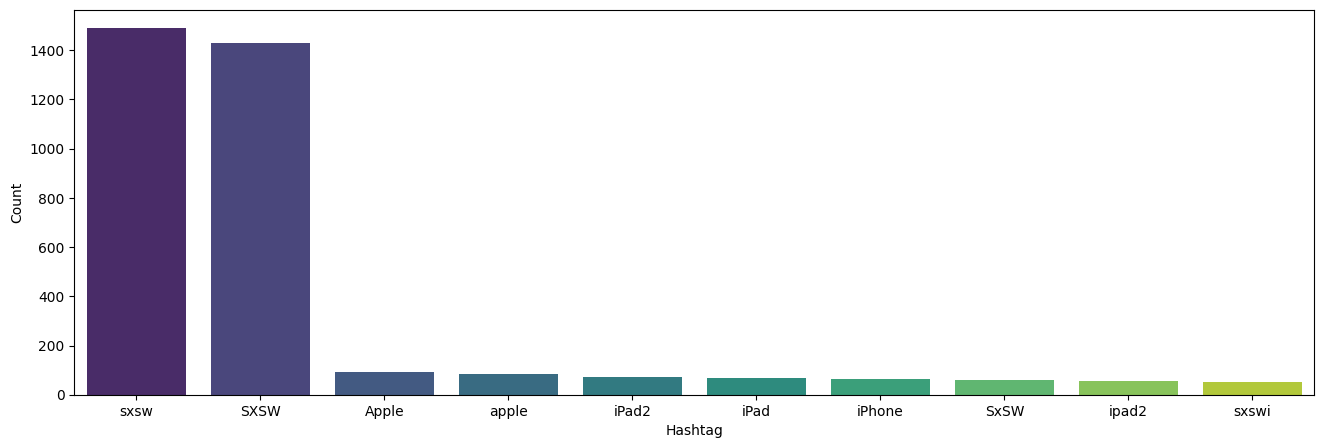

In [118]:
# Get the top 10 hashtags using nlargest from pandas
d = d.nlargest(10, 'Count') # Use nlargest on the DataFrame 'd'

plt.figure(figsize=(16, 5))
ax = sns.barplot(data=d, x='Hashtag', y='Count', palette="viridis")  # Add palette="viridis" for colors
ax.set(ylabel='Count')
plt.show()

In [122]:
# Assuming negative_hashtags was created earlier (e.g., in a previous cell)
freq = nltk.FreqDist([hashtag for sublist in negative_hashtags for hashtag in sublist]) # Flatten negative_hashtags
d = pd.DataFrame({'Hashtag': list(freq.keys()), 'Count': list(freq.values())})
d.head()


,Hashtag,Count
0,RISE_Austin,2
1,SXSW,232
2,sxsw,331
3,iPhone,8
4,Google,10


[Text(0, 0.5, 'Count')]

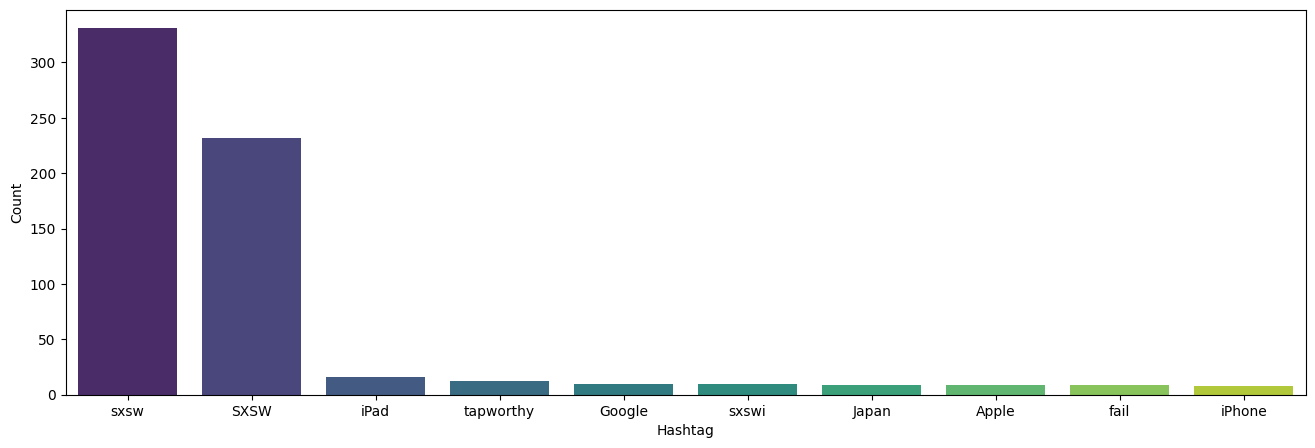

In [123]:
d = d.nlargest(10, 'Count')

plt.figure(figsize=(16, 5))
ax = sns.barplot(data=d, x='Hashtag', y='Count', palette="viridis")
ax.set(ylabel='Count')

## FEATURE ENGINEERING

In [128]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import gensim

In [130]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# Join the list of tokens back into a single string for each document
df['lemmatized_text_str'] = df['lemmatized_text'].apply(' '.join)

# Now, fit_transform on the string version of the column
bow = bow_vectorizer.fit_transform(df['lemmatized_text_str'])
bow.shape
#

(9093, 1000)

##TF -IDF features

In [131]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['lemmatized_text_str'])
tfidf.shape

(9093, 1000)